In [1]:
import numpy as np
import matplotlib.pyplot as plt

import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
import lsst.afw.geom as afwGeom
import lsst.afw.image as afwImage
import lsst.afw.cameraGeom.utils as cgUtils

import pfs.drp.stella.utils as drpStellaUtils

afwDisplay.setDefaultBackend("matplotlib")
%matplotlib notebook 

In [2]:
butler = dafPersist.Butler("/datasets/PFS/LAM/rerun/rhl/tmp")
dataId = dict(arm='r', spectrograph=1)

camera = butler.get('camera')

In [3]:
#cgUtils.plotFocalPlane(camera);

<IPython.core.display.Javascript object>


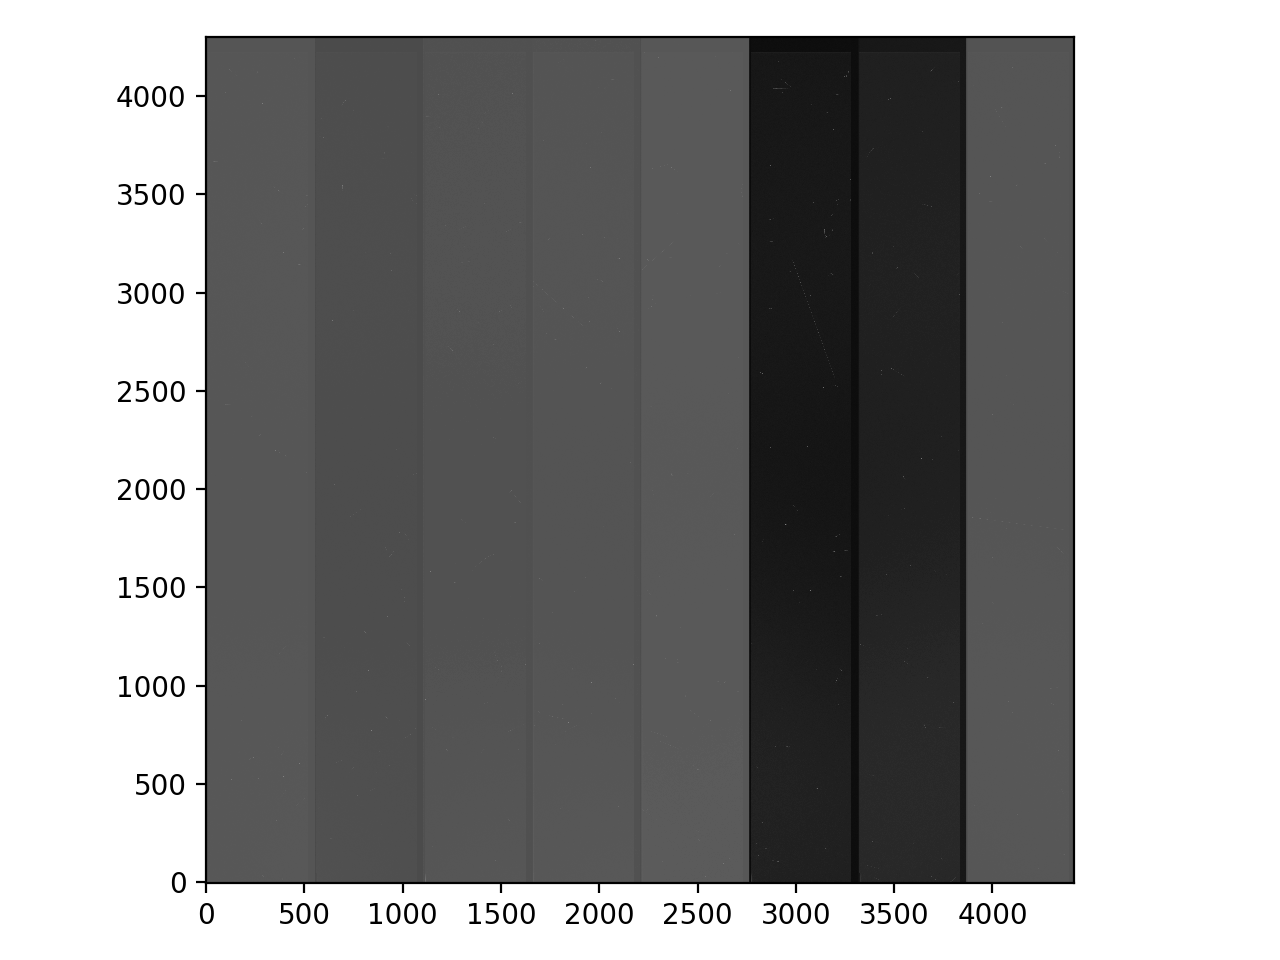

In [15]:
disp = afwDisplay.Display(1)

raw = butler.get('raw', dataId, visit=2618)

disp.scale('asinh', 9000, 12000)
#disp.scale(None, 0, 0)
disp.mtv(raw);

<IPython.core.display.Javascript object>


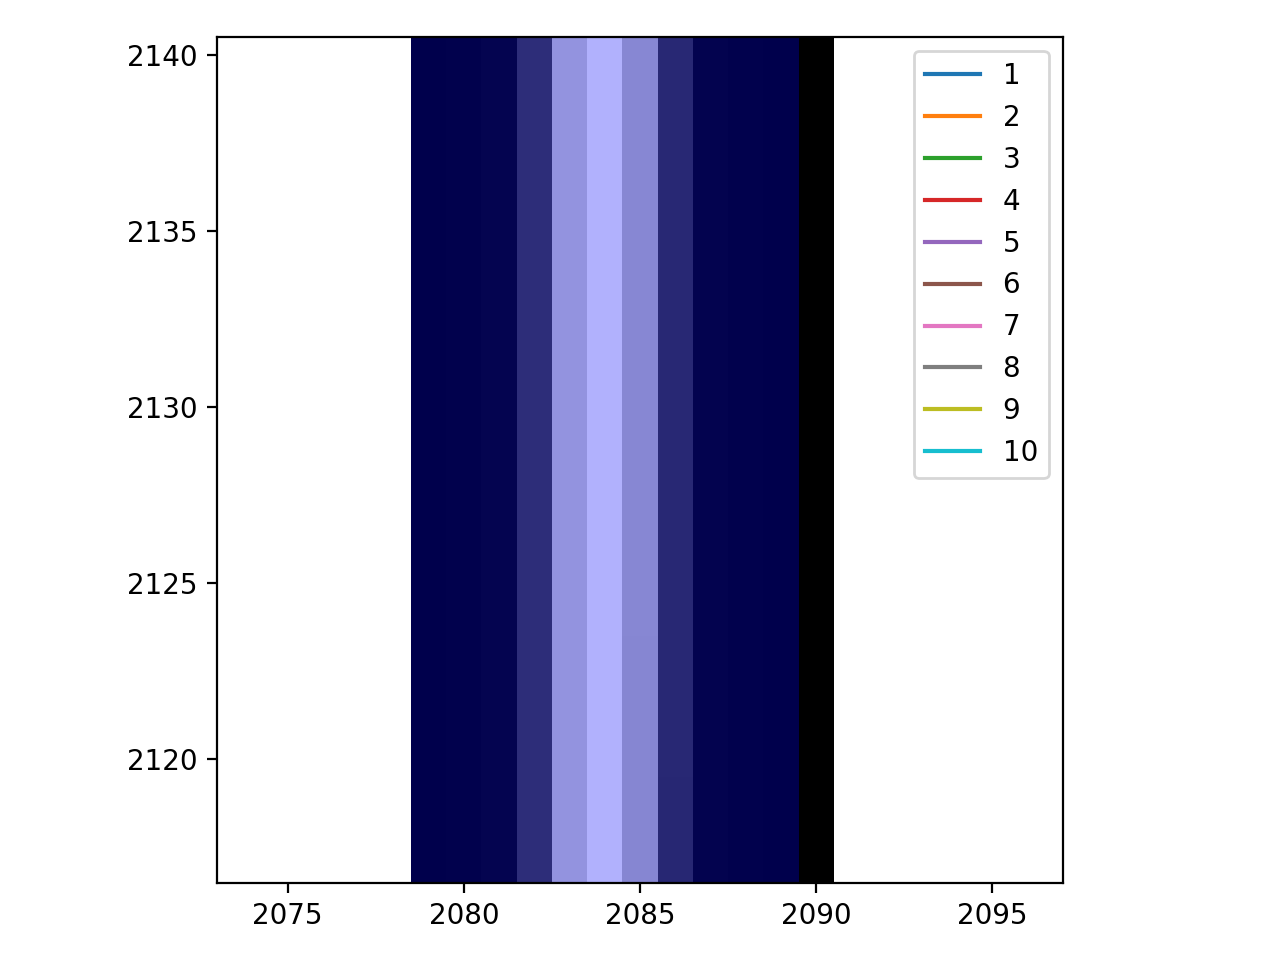

In [5]:
disp2 = afwDisplay.Display(0)

from lsst.ip.isr import AssembleCcdTask

config = AssembleCcdTask.ConfigClass()
config.doTrim = True

assembleTask = AssembleCcdTask(config=config)

exposure = assembleTask.assembleCcd(raw)
#print exposure.image.array.min(), exposure.image.array.max()
disp2.scale('linear', exposure.image.array.min(), exposure.image.array.min() + 3000)
if True:
    disp2.mtv(exposure.image)
else:
    disp2.erase()
cgUtils.overlayCcdBoxes(exposure.getDetector(), display=disp2, isTrimmed=config.doTrim) # , ignoreBBoxes=["ccd", "raw"])

In [6]:
if False:
    print butler.queryMetadata('raw', ['visit'], arm='r', spectrograph=1)

<IPython.core.display.Javascript object>


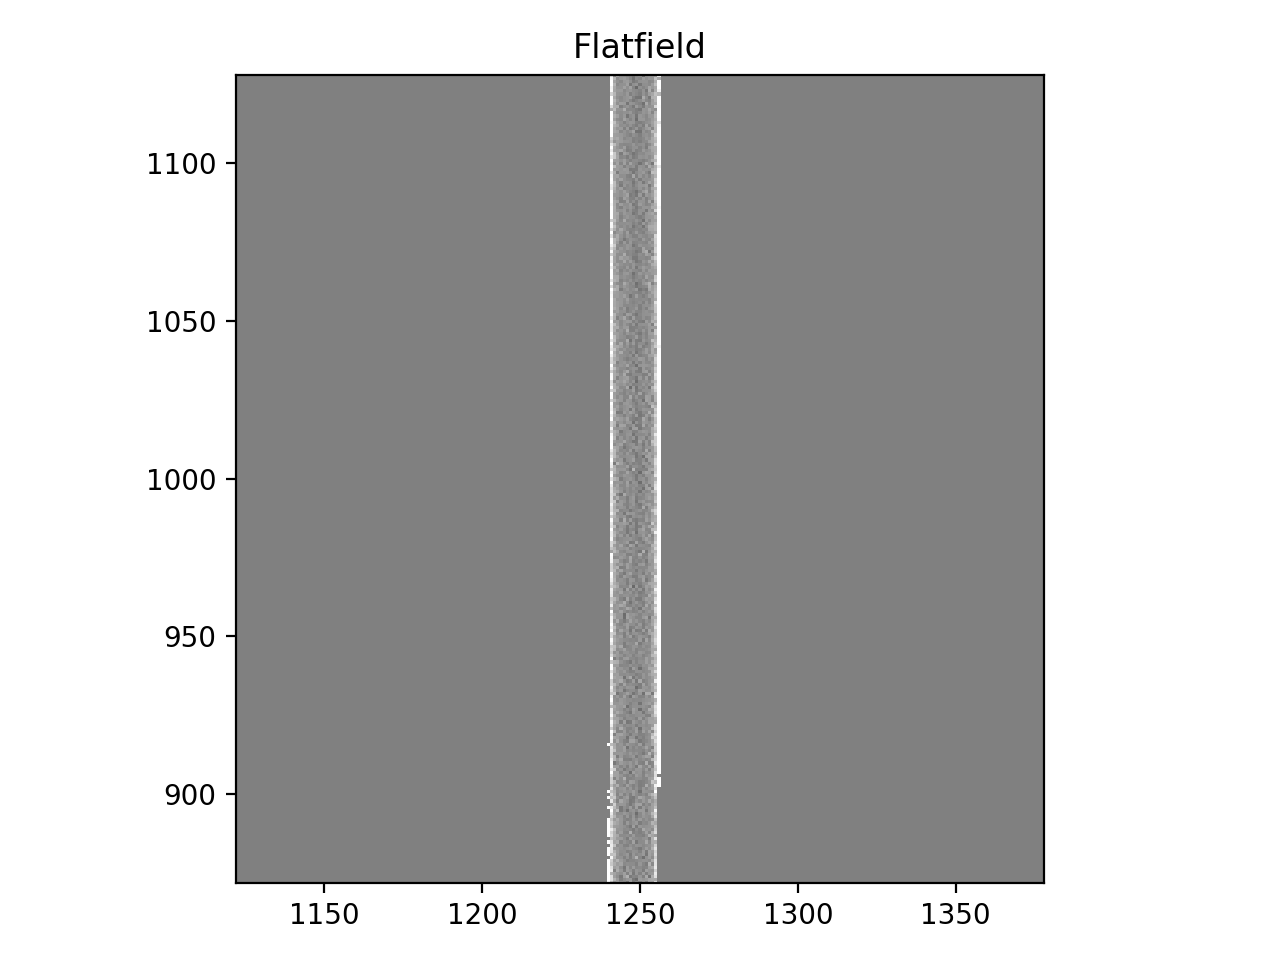

In [7]:
disp2 = afwDisplay.Display(2)

dark = butler.get("calexp", dataId, visit=2620)

if True:
    try:
        disp2.setImage(dark)
    except:
        pass
    disp2.scale(algorithm='asinh', min="zscale", Q=8)
else:
    disp2.scale(algorithm='asinh', min=-5, max=5, Q=8)
disp2.mtv(dark)
disp2.zoom(4, 3000, 2800)

In [8]:
dark.getInfo().getVisitInfo().getExposureTime()

900.0

In [9]:
fiberTrace = butler.get("fibertrace", dataId, visit=2208)
arc = butler.get("calexp", dataId, visit=2208)

fiberTraceSet = drpStellaUtils.makeFiberTraceSet(fiberTrace)

In [10]:
disp2 = afwDisplay.Display(2)

drpStellaUtils.addFiberTraceSetToMask(arc.mask, fiberTraceSet)
disp2.setMaskTransparency(50)
disp2.mtv(arc, "Arcs");

In [11]:
disp = afwDisplay.Display()
tr = fiberTraceSet.getTraces()[5]

disp.mtv(tr.getTrace())
disp.zoom(1)

In [12]:
#flatId = 1269
for visit in [2208, ]:
    pfsArm = butler.get("pfsArm", dataId, visit=visit)
    for fid in range(1, 11):
        if False:
            pfsArm.plot(fid, showPlot=False) 
        else:
            plt.plot(pfsArm.lam[fid-1], pfsArm.flux[fid-1], label=str(fid))
plt.legend();

In [13]:
flat = butler.get("flat", dataId, visit=2208)

disp2 = afwDisplay.Display(2)

disp2.scale('linear', 0.95, 1.05)
disp2.mtv(flat.image, "Flatfield");
disp2.zoom(32, 1250, 1000)

In [14]:
ccd = arc.getDetector()
[a.getReadNoise() for a in ccd]

[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]